In [1]:
from CoralReefAnalysis.Analysis import *

from scipy.stats import linregress
from scipy.optimize import curve_fit

import time
import glob

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from matplotlib import rcParams

rcParams["font.size"] = 20
rcParams["axes.labelsize"] = 30

rcParams["xtick.labelsize"] = 16
rcParams["ytick.labelsize"] = 16

rcParams["figure.figsize"] = (8,6)

import warnings
warnings.filterwarnings('ignore')

/home/alex/Coral_Reef_Characterization/CoralReefAnalysis/Analysis.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


# Reef size distribution

In [ ]:
input_folder = "/data/bio/corals/Clusterized_data/Coral/"

output_folder_pdf = "Processed_data/Reef_size_PDF"
output_folder_ccdf = "Processed_data/Reef_size_CCDF"

#reef_size_distribution_txt(input_folder, output_folder_pdf, output_folder_ccdf)

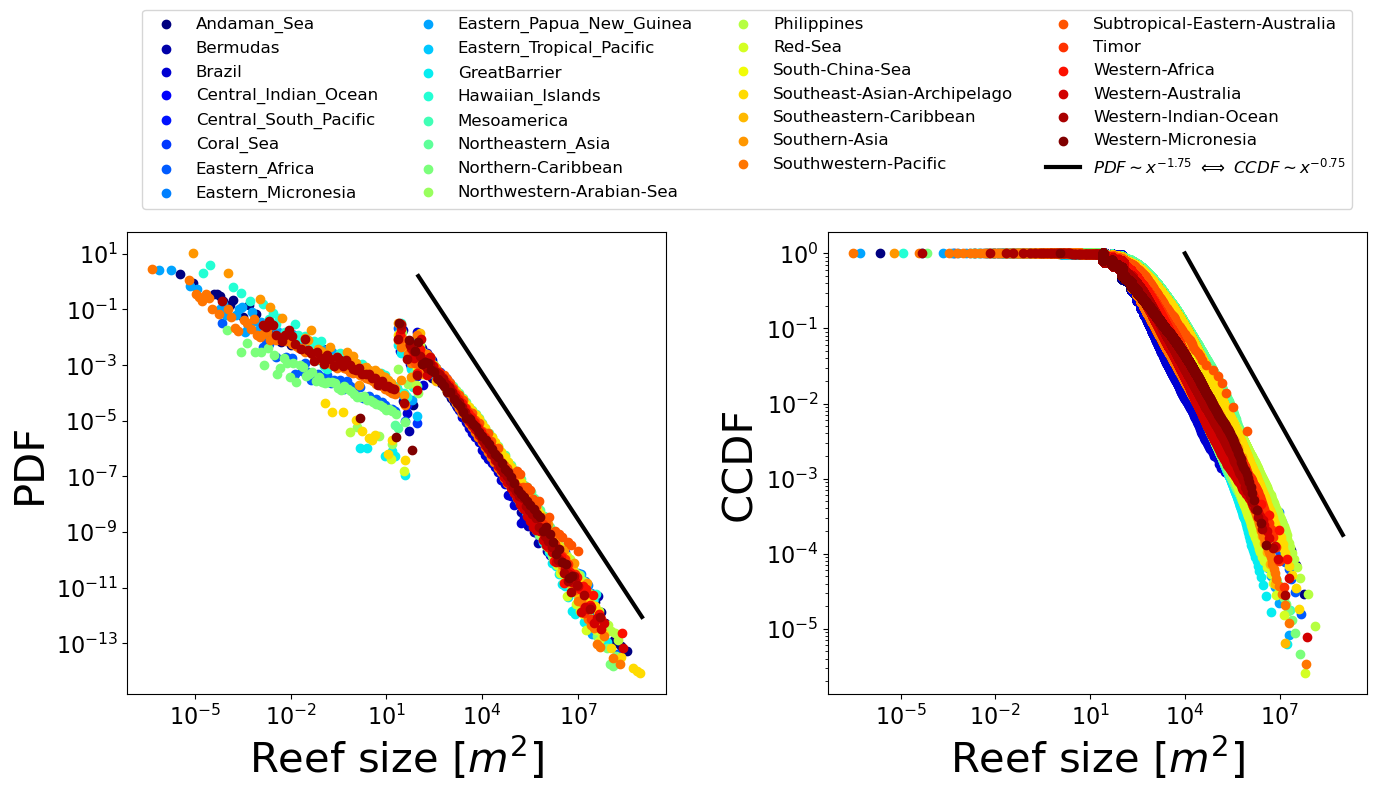

In [15]:
provinces = [item[0:-8] for item in np.sort(os.listdir("/data/bio/corals/Clusterized_data/Coral/"))]

colors = plt.get_cmap("jet", len(provinces))

fig, ax = plt.subplot_mosaic("""AB""", figsize=(8*2, 6))

slopes = []
intercepts = []

i = 0

for province in provinces:

    t0 = time.time()

    #print("Plotting %s..." % province, end="")
    
    x_pdf, y_pdf = np.loadtxt("Processed_data/Reef_size_PDF/%s.txt" % province, unpack=True)
    x_ccdf, y_ccdf = np.loadtxt("Processed_data/Reef_size_CCDF/%s.txt" % province, unpack=True)

    #lr_pdf = linregress(np.log(x_pdf[x_pdf > 10**3]))
   
    ax["A"].scatter(x_pdf, y_pdf, color=colors(i), label=province)
    ax["B"].scatter(x_ccdf[0:-1:10], y_ccdf[0:-1:10], color=colors(i), label=province)

    #print("done in %.2f s" % ((time.time()-t0)))

    i += 1

x = np.logspace(2, 9, 1000)
x2 = np.logspace(4, 9, 1000)

ax["A"].plot(x, 5*10**3 * np.power(x, -1.75), lw=3, color="k", label=r"$PDF\sim x^{-1.75} \ \Longleftrightarrow \ CCDF\sim x^{-0.75}$")
ax["B"].plot(x2, 10**3 * np.power(x2, -1.75+1), lw=3, color="k", label=r"$y\sim x^{-0.75}$")

ax["A"].set_xscale("log")
ax["A"].set_yscale("log")

ax["B"].set_xscale("log")
ax["B"].set_yscale("log")

ax["A"].set_ylabel("PDF")
ax["A"].set_xlabel(r"Reef size $[m^2]$")

ax["B"].set_ylabel("CCDF")
ax["B"].set_xlabel(r"Reef size $[m^2]$")

ax["A"].legend(ncol=4, loc="upper center", bbox_to_anchor=(1.15, 1.5), fontsize=12)

plt.subplots_adjust(wspace=0.3)

plt.savefig("Figures/Reef_size_distribution.png", dpi=400, bbox_inches="tight")

# Reef fractality

## Hausdorf Dimension (Box counting) of Reef in each Province

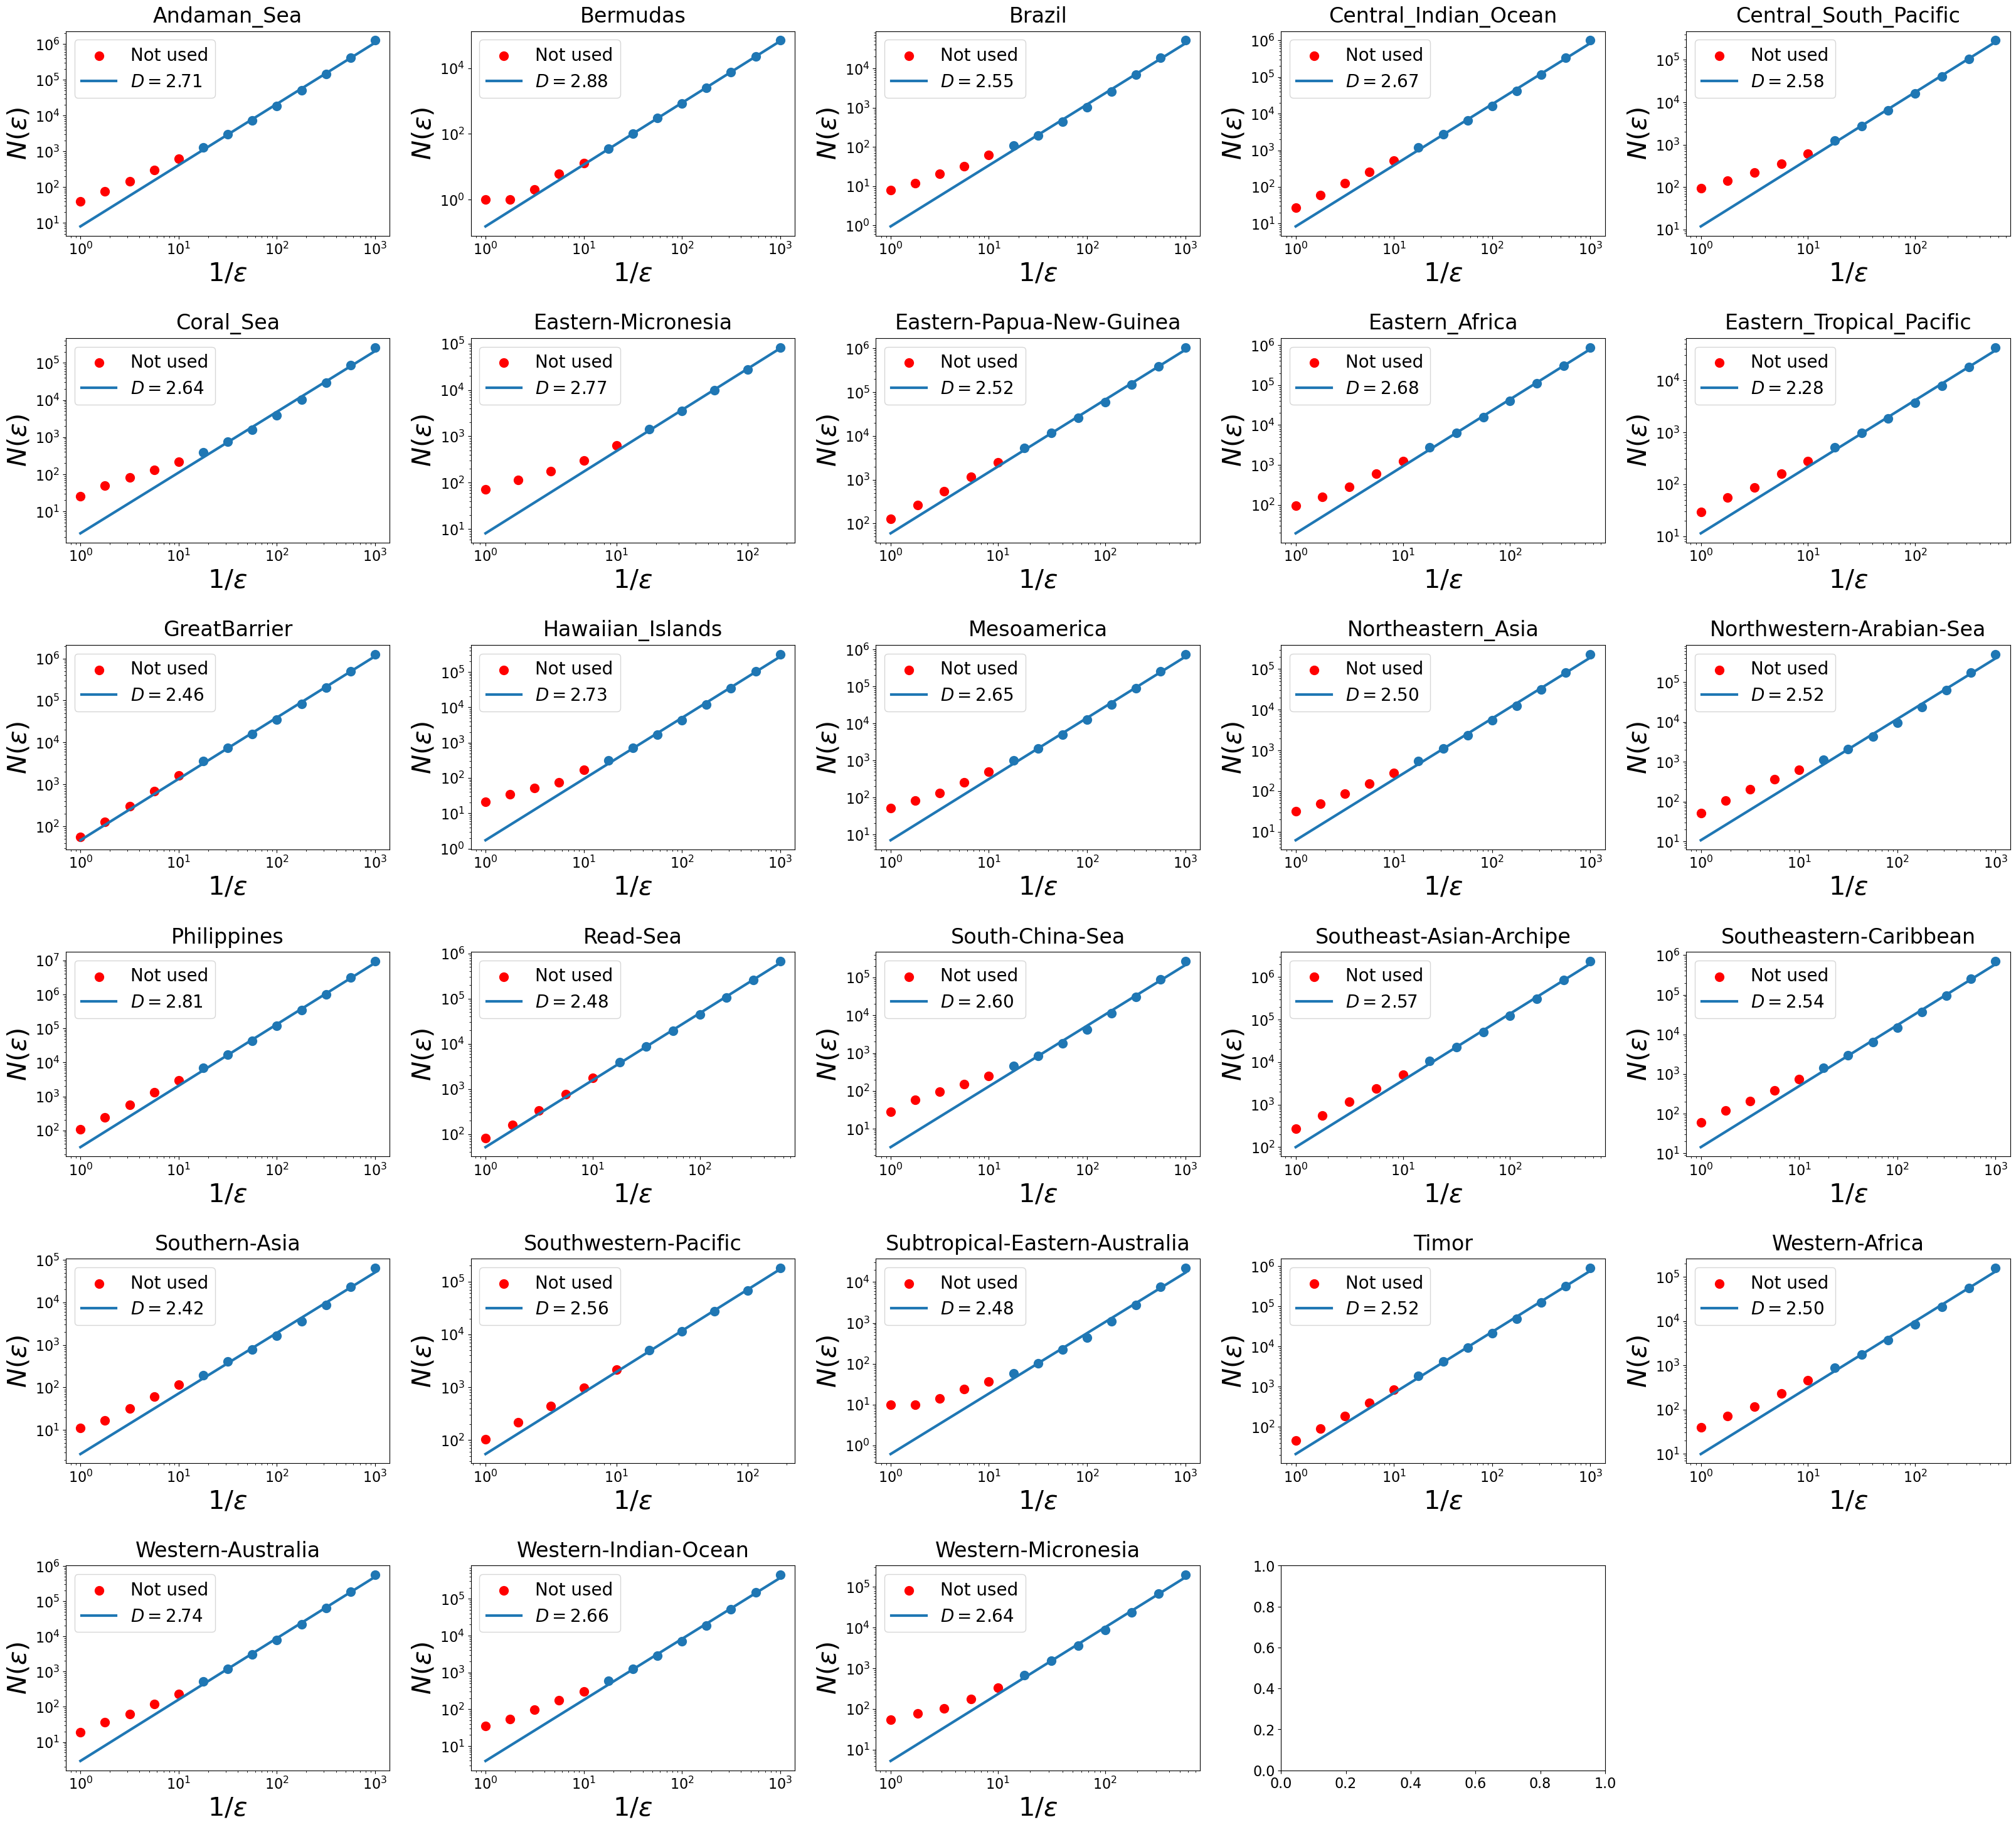

In [16]:
filenames = np.sort(os.listdir("Processed_data/Box_Counting_Dimension/"))

Ds = []
errors = []

fig, ax = plt.subplot_mosaic("""ABCDE
FGHIJ
KLMNO
PQRST
UVWXY
Z123.""", figsize=(8*5, 6*6))

letters = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T",
          "U", "V", "W", "X", "Y", "Z", "1", "2", "3", "4", "5", "6"]

i = 0

for filename in filenames:

    x, y = np.loadtxt("Processed_data/Box_Counting_Dimension/%s" % filename, unpack=True)

    x = 1/x
    
    slope, intercept, r, p, se = linregress(np.log(x[5:]), np.log(y[5:]))

    Ds.append(slope + 1)
    errors.append(se)

    ax[letters[i]].scatter(x[5:], y[5:], s=100)
    ax[letters[i]].scatter(x[0:5], y[0:5], s=100, color='r', label="Not used")
    
    ax[letters[i]].plot(x, x**slope*np.exp(intercept), lw=3, label=r"$D=%.2f$" % (1+slope))

    ax[letters[i]].set_yscale("log")
    ax[letters[i]].set_xscale("log")

    ax[letters[i]].set_xlabel(r"$1/\epsilon$")
    ax[letters[i]].set_ylabel(r"$N(\epsilon)$")
    
    ax[letters[i]].set_title(filename[0:-4], pad=10)

    ax[letters[i]].legend()
        
    i += 1
    
plt.subplots_adjust(wspace=0.25, hspace=0.5)

plt.savefig("Figures/Box_Counting_Dimensions.png", dpi=300, bbox_inches="tight")

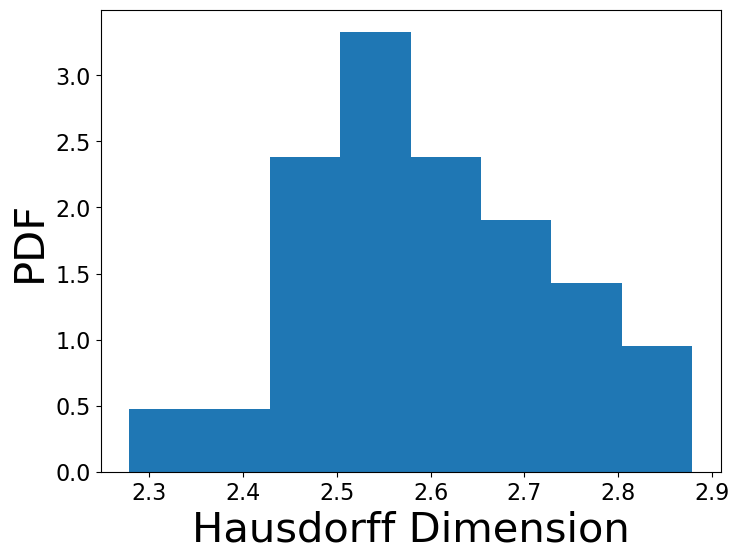

In [28]:
plt.hist(Ds, bins=8, density=True)

plt.ylabel("PDF")
plt.xlabel("Hausdorff Dimension")

plt.savefig("Figures/Histogram_Hausdorff_dimensions.png", dpi=300, bbox_inches="tight")

## Scaling between area and perimeter (Mass Fractal Dimension)

In [ ]:
input_folder = "Data/Coral"
outfilename = "Processed_data/Area_Perimeter_provinces"

#Area_Perimeter_scaling(input_folder, outfilename)

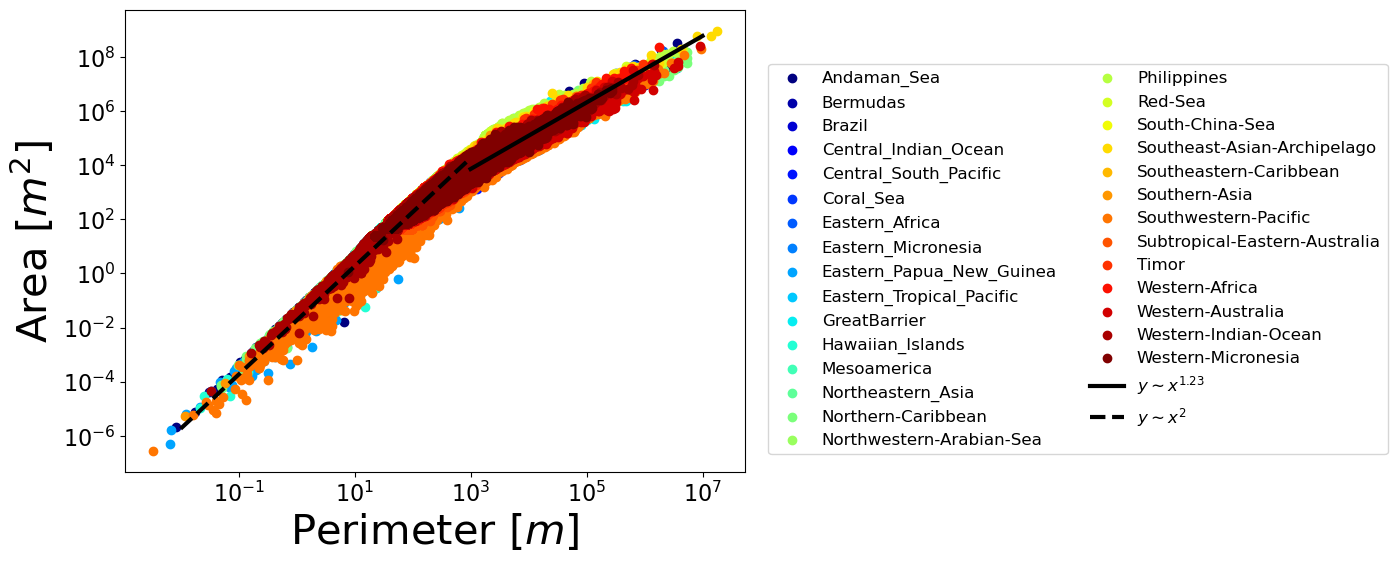

In [29]:
df = pd.read_parquet("Processed_data/Area_Perimeter_provinces.parquet")

provinces = np.sort(np.unique(df["Province"].values))

cutoff_1 = 10**3
cutoff_2 = 10**1

x2 = np.logspace(-2, 3, 1000)
x1 = np.logspace(3, 7, 1000)

colors = plt.get_cmap("jet", len(provinces))

i = 0

results_fit_1 = np.zeros((len(provinces), 6)) #Slope, Intercept, rvalue, pvalue, stderr, intercept_stderr
results_fit_2 = np.zeros((len(provinces), 6)) #Slope, Intercept, rvalue, pvalue, stderr, intercept_stderr

plt.figure(figsize=(8, 6))

for province in provinces:

    df_province = df[df["Province"] == province]

    plt.scatter(df_province["Perimeter"], df_province["Area"], color=colors(i), label=province)

    lr1 = linregress(np.log(df_province["Perimeter"][df["Perimeter"] > cutoff_1]), np.log(df_province["Area"][df["Perimeter"] > cutoff_1]))

    results_fit_1[i, :] = list(lr1) + [lr1.intercept_stderr]

    if len(df_province["Perimeter"][df["Perimeter"] <= cutoff_2]) > 3:

        lr2 = linregress(np.log(df_province["Perimeter"][df["Perimeter"] <= cutoff_2]), np.log(df_province["Area"][df["Perimeter"] <= cutoff_2]))

        results_fit_2[i, :] = list(lr2) + [lr2.intercept_stderr]

    else:

        results_fit_2[i, :] = [np.nan for i in range(6)]

    
    i += 1

df_results = pd.DataFrame({'Slope 1': results_fit_1[:, 0], 'Intercept 1':results_fit_1[:, 1], 'R^2 1':results_fit_1[:, 2], 'p-value 1':results_fit_1[:, 3], 
                   'Slope err 1':results_fit_1[:, 4], 'Intercept err 1':results_fit_1[:, 5], 'Slope 2': results_fit_2[:, 0], 'Intercept 2':results_fit_2[:, 1], 
                   'R^2 2':results_fit_2[:, 2], 'p-value 2':results_fit_2[:, 3], 'Slope err 2':results_fit_2[:, 4], 'Intercept err 2':results_fit_2[:, 5]})

df_results.to_csv("Processed_data/Area_perimeter_provinces_results.csv")

mean_slope_1 = np.mean(results_fit_1[:, 0])
mean_slope_2 = np.nanmean(results_fit_2[:, 0])

mean_intercept_1 = np.mean(results_fit_1[:, 1])
mean_intercept_2 = np.nanmean(results_fit_2[:, 1])

plt.plot(x1, np.exp(mean_intercept_1)*np.power(x1, mean_slope_1), color="k", lw=3, label=r"$y\sim x^{%.2f}$" % mean_slope_1)

#plt.plot(x2, np.exp(mean_intercept_2)*np.power(x2, mean_slope_2), color="k", lw=3)
plt.plot(x2, np.exp(-4)*np.power(x2, 2), color="k", lw=3, ls="--", label=r"$y\sim x^{2}$")

plt.yscale("log")
plt.xscale("log")

plt.ylabel(r"Area $[m^2]$")
plt.xlabel(r"Perimeter $[m]$")

plt.legend(ncol=2, loc="upper right", bbox_to_anchor=(2.05, 0.9), fontsize=12)

plt.savefig("Figures/Area_perimeter_scaling.png", dpi=400, bbox_inches="tight")

## Multifractal dimension

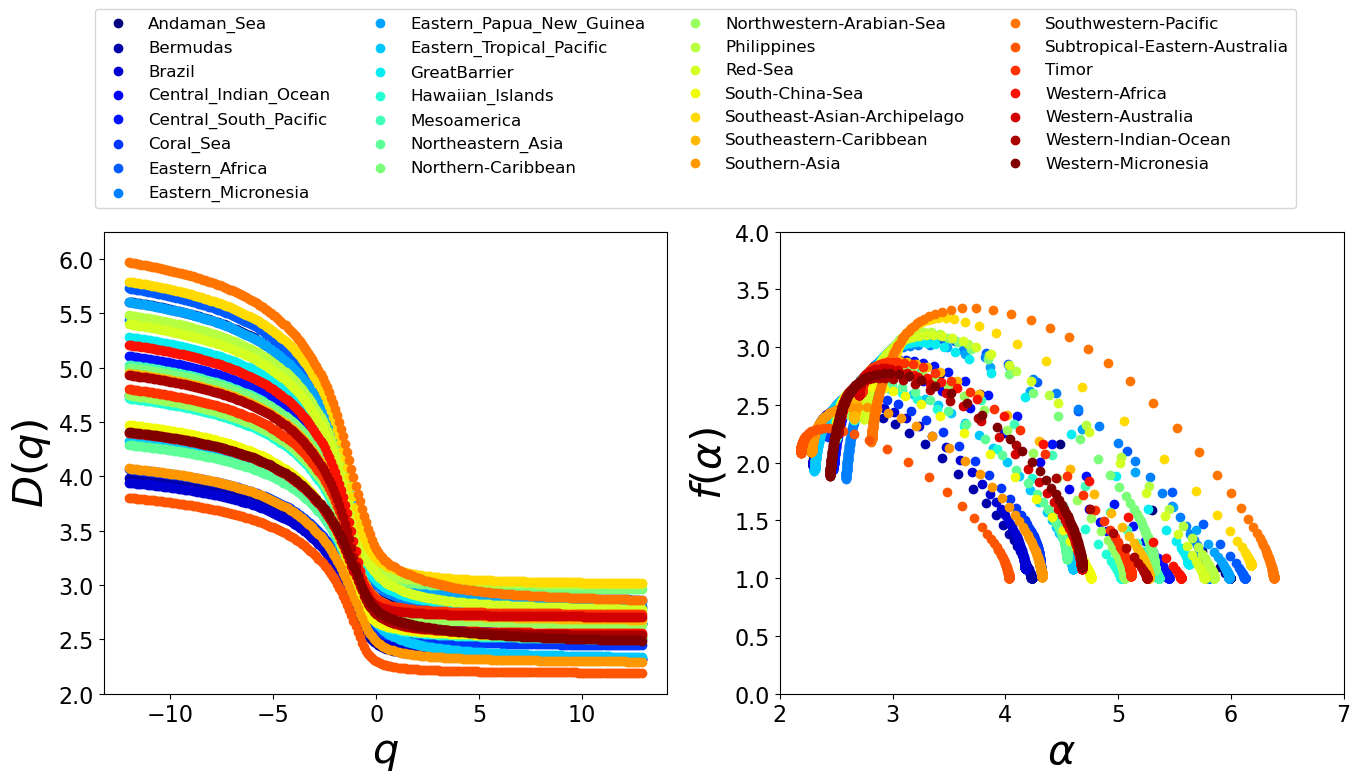

In [267]:
provinces = [item[0:-8] for item in np.sort(os.listdir("/data/bio/corals/Clusterized_data/Coral/"))]

colors = plt.get_cmap("jet", len(provinces))

i = 0

fig, ax = plt.subplot_mosaic("""AB""", figsize=(8*2, 6))

for province in provinces:

    filenames = np.sort(glob.glob("Processed_data/Multifractal_dimension/%s*" % province))[::-1]

    #Use the Dq's computed with highest resolution, assume the Dq has already converged

    q, P_q, D_q = np.loadtxt(filenames[-1], unpack=True)

    D_q = D_q + 1

    α = (np.roll(D_q*(q-1), shift=-1) - D_q*(q-1)) / (q[1]-q[0])

    f_alpha = - (D_q*(q-1) - q*α)

    ax["A"].scatter(q, D_q, color=colors(i), label=province)
    ax["B"].scatter(α, f_alpha, color=colors(i), label=province)

    i += 1

ax["A"].set_ylim(2, 6.25)
ax["B"].set_ylim(0, 4)
ax["B"].set_xlim(2, 7)

ax["A"].set_ylabel(r"$D(q)$")
ax["A"].set_xlabel(r"$q$")

ax["B"].set_ylabel(r"$f(\alpha)$")
ax["B"].set_xlabel(r"$\alpha$")

ax["A"].legend(loc="upper center", ncol=4, fontsize=12, bbox_to_anchor=(1.05, 1.5))

plt.savefig("Figures/multifractal_spectrum.png", dpi=300, bbox_inches="tight")

## Clorofila and fractal dimension

In [300]:
import xarray as xr

ds = xr.open_dataset("clorofila_06_2021/ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_4km_GEO_PML_OCx-20210701-fv5.0.1.nc")

ch = np.log(ds["chlor_a"].values[0])

ds

<xarray.Dataset>
Dimensions:             (time: 1, lat: 4320, lon: 8640)
Coordinates:
  * lat                 (lat) float64 89.98 89.94 89.9 ... -89.9 -89.94 -89.98
  * lon                 (lon) float64 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time                (time) datetime64[ns] 2021-07-01
Data variables:
    MERIS_nobs          (time, lat, lon) float32 ...
    MODISA_nobs         (time, lat, lon) float32 ...
    OLCI_nobs           (time, lat, lon) float32 ...
    SeaWiFS_nobs        (time, lat, lon) float32 ...
    VIIRS_nobs          (time, lat, lon) float32 ...
    chlor_a             (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    chlor_a_log10_bias  (time, lat, lon) float32 ...
    chlor_a_log10_rmsd  (time, lat, lon) float32 ...
    crs                 (time) int32 ...
    total_nobs          (time, lat, lon) float32 ...
Attributes: (12/49)
    Conventions:                       CF-1.7
    start_date:                        01-JUL-2021 00:00:00.000000
    stop_date:                         01-JUL-2021 23:59:00.000000
    Metadata_Conventions:              Unidata Dataset Discovery v1.0
    cdm_data_type:                     Grid
    comment:                           See summary attribute
    ...                                ...
    time_coverage_start:               202107010000Z
    title:                             ESA CCI Ocean Colour Product
    tracking_id:                       7fccddc3-b4bb-420c-99e9-45e9b843953c
    history:                           Source data were: NASA OBPG SeaWiFS le...
    netcdf_file_type:                  NETCDF4_CLASSIC
    id:                                ESACCI-OC-L3S-CHLOR_A-MERGED-1D_DAILY_...

In [367]:
df = pd.read_csv("Processed_data/Boundaries_provinces.csv")

years = np.arange(2000, 2001, 1)

months = np.arange(1, 13, 1)

ch_provinces = []

for province in df["Province"].values:

    t0 = time.time()

    print("Computing %s..." % province, end="")

    df_province = df[df["Province"] == province]

    min_lon = df_province["Min lon"].values[0]
    max_lon = df_province["Max lon"].values[0]
    min_lat = df_province["Min lat"].values[0]
    max_lat = df_province["Max lat"].values[0]

    ch = 0.0

    count = 0

    for year in years:

        for month in months:

            filenames = os.listdir("/data/bio/corals/Clorofila/%s_%s/" % (str(month).zfill(2), year))

            for filename in filenames:

                ds = xr.open_dataset("/data/bio/corals/Clorofila/%s_%s/%s" % (str(month).zfill(2), year, filename))

                ch += ds.sel(lon=slice(min_lon, max_lon), lat=slice(max_lat, min_lat))["chlor_a"].values[0]

                count += 1

    ch_provinces.append(ch / count)

    print("done in %.2f m" % ((time.time() - t0) / 60.0))


Computing Western-Indian-Ocean...done in 1.00 m
Computing Andaman_Sea...done in 0.81 m
Computing Red-Sea...done in 0.83 m
Computing Coral_Sea...done in 0.73 m
Computing Philippines...done in 0.61 m
Computing Central_South_Pacific...done in 0.70 m
Computing Hawaiian_Islands...done in 0.81 m
Computing Eastern_Africa...done in 0.51 m
Computing Western-Micronesia...done in 0.53 m
Computing Western-Australia...done in 0.29 m
Computing Northeastern_Asia...

# Taylor's law within reef provinces

In [ ]:
province = "Bermudas"

ϵ = 0.01

filename = "/data/bio/corals/Clusterized_data/Coral/%s.geojson" % province

mean_densities, var_densities = Taylor_law(filename, ϵ)

In [ ]:
results = linregress(np.log(mean_densities[(var_densities > 0) & (mean_densities > 0)]), np.log(var_densities[(var_densities > 0) & (mean_densities > 0)]))

x = np.logspace(1, 6, 1000)

plt.scatter(mean_densities, var_densities)
plt.plot(x, x**results.slope * np.exp(results.intercept), color="k", lw=3, label=r"$y\sim x^{%.2f}$" % results.slope)

plt.xscale("log")
plt.yscale("log")

plt.legend(fontsize=18)

# Taylor's law among reef provinces

In [ ]:
filenames = os.listdir("Data/Coral/")

mean_density_provinces = []
var_density_provinces = []

for filename in filenames:

    print("Computing %s" % filename[18:-8])

    filename = "Data/Coral/%s" % filename

    gdf = gpd.read_file("%s" % filename)

    mean_area = gdf["area (m2)"].mean()
    var_area = gdf["area (m2)"].var()

    mean_density_provinces.append(mean_area)
    var_density_provinces.append(var_area)

In [ ]:
plt.scatter(mean_density_provinces, var_density_provinces)

plt.yscale("log")
plt.xscale("log")